First, I'll load the user data and take a quick look.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('notebook')

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin_1', parse_dates=['creation_time'])

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
# Convert unix timestamp column to datetime
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

# Drop personal info columns
users = users.drop(columns=['name','email'])

In [6]:
# Change columns to appropriate type
users['invited_by_user_id'] = users.invited_by_user_id.apply(lambda x: str(int(x)) if not np.isnan(x) else np.nan)
users[['object_id','org_id']] = users[['object_id','org_id']].astype('object')

In [7]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  object        
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  object        
 7   invited_by_user_id          6417 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 750.1+ KB


These data will probably require more modification before analysis, for example creating dummies for `creation_source` if we use ML, but let's pause here and load up the engagement data.

In [9]:
logins = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])

In [10]:
logins.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


Is the entire `visited` column just 1s?

In [12]:
logins.visited.describe()

count    207917.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: visited, dtype: float64

Yes, it is. Helpful for aggregating. Now, I need to find out which users have logged on 3 times during at least one 7-day period.

Given the context, I think it's reasonable to drop the times from the timestamp column and concern ourselves only with dates. From there, I could pivot dates by user IDs, summing log-ins. Then, it's just a matter of calculating a 7-day rolling sum of total number of logins by user. If that number ever reaches or exceeds 3, we can say that that user is 'adopted'.

In [13]:
logins['time_stamp'] = logins.time_stamp.dt.date
logins.sort_values(by='time_stamp', inplace=True)
logins_pivot = logins.pivot(index='time_stamp',columns='user_id',values='visited').fillna(0)
logins_pivot

user_id,1,2,3,4,5,6,7,10,11,13,...,11989,11990,11991,11992,11995,11996,11997,11998,11999,12000
time_stamp,,,,,,,,,,,,,,,,,,,,,
2012-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-06-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-06-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I can see an issue here: Not every day contains a login. June 5th is missing from the index. How many missing days do I have?

In [14]:
logins.time_stamp.max() - logins.time_stamp.min()

datetime.timedelta(days=736)

In [15]:
pd.date_range(logins.time_stamp.min(), logins.time_stamp.max())

DatetimeIndex(['2012-05-31', '2012-06-01', '2012-06-02', '2012-06-03',
               '2012-06-04', '2012-06-05', '2012-06-06', '2012-06-07',
               '2012-06-08', '2012-06-09',
               ...
               '2014-05-28', '2014-05-29', '2014-05-30', '2014-05-31',
               '2014-06-01', '2014-06-02', '2014-06-03', '2014-06-04',
               '2014-06-05', '2014-06-06'],
              dtype='datetime64[ns]', length=737, freq='D')

A date range with no gaps that shares the same start- and end-dates as the dataset would contain 737 dates. Our dataset contains 736 dates. Seems like June 05 2014 is the only missing date, then. I'll call that close enough for government work.

Let's calculate a rolling 7-day sum for each user ID:

In [16]:
logins_pivot_rolling = logins_pivot.rolling(window=7).sum()
logins_pivot_rolling.head(10)

user_id,1,2,3,4,5,6,7,10,11,13,...,11989,11990,11991,11992,11995,11996,11997,11998,11999,12000
time_stamp,,,,,,,,,,,,,,,,,,,,,
2012-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-06-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


User 11999 was active on June 2nd, but not on any surrounding days. As such, their value for June 6th through 8th above is 1. This looks good. Now, we can say that any user who has any value 3 or greater in the table above was "adopted"; they had at least one 7-day stretch which contained 3 or more logins.

In [17]:
adopted_user = {}

In [18]:
for id in range(1,12001):
    try:
        if logins_pivot_rolling[id].max() >= 3:
            adopted_user[str(id)]=1
        else:
            adopted_user[str(id)]=0
    except KeyError:
        adopted_user[str(id)]=0

Quick spot-check:

In [19]:
logins[logins.user_id==2011]

,time_stamp,user_id,visited
32487,2013-01-18,2011,1
32488,2013-02-10,2011,1
32489,2013-02-16,2011,1
32490,2013-02-26,2011,1
32491,2013-03-03,2011,1
...,...,...,...
32718,2014-05-31,2011,1
32719,2014-06-01,2011,1
32720,2014-06-02,2011,1
32721,2014-06-03,2011,1


In [20]:
logins_pivot_rolling[2011]

time_stamp
2012-05-31    NaN
2012-06-01    NaN
2012-06-02    NaN
2012-06-03    NaN
2012-06-04    NaN
             ... 
2014-06-01    7.0
2014-06-02    7.0
2014-06-03    7.0
2014-06-04    7.0
2014-06-06    6.0
Name: 2011, Length: 736, dtype: float64

In [21]:
adopted_user['2011']

1

---
## _Timing note:_
_At this point, I have spent over 2 hours on this take-home challenge. The instructions suggest 1-2 hours._

---

Now that I have an indication of "adopted" vs "not-adopted" for each user ID, I can add that back to my user data.

In [22]:
users['adopted'] = [x for x in adopted_user.values()]
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0


In [23]:
print('Percentage of users meeting adoption criterion: {}%'.format(round(users.adopted.sum()/len(users) * 100, 2)))

Percentage of users meeting adoption criterion: 13.35%


In [24]:
def adoption_rates_for_column(column):
    for value in users[column].unique():
        try:
            percentage = round(len(users[(users[column]==value) & 
                                       (users['adopted']==1)])/ 
                             len(users[users[column]==value])*100, 2)
        except ZeroDivisionError:
            percentage = '(zero denominator)'
        print("For users with {} {}, adoption rate is {}%".format(column, value, percentage))

In [25]:
adoption_rates_for_column('creation_source')

For users with creation_source GUEST_INVITE, adoption rate is 16.64%
For users with creation_source ORG_INVITE, adoption rate is 13.0%
For users with creation_source SIGNUP, adoption rate is 14.04%
For users with creation_source PERSONAL_PROJECTS, adoption rate is 7.77%
For users with creation_source SIGNUP_GOOGLE_AUTH, adoption rate is 16.75%


Users who were invited to join another's personal workspace ('PERSONAL_PROJECTS') were about half as likely to adopt as users from other creation sources. On the other hand, those who signed up via Google Authentication had about a 3% increase in their adoption rate, compared to the other creation sources (other than personal projects). A three percent increase is enough to justify the argument that this channel should be considered especially valuable.

In [26]:
adoption_rates_for_column('opted_in_to_mailing_list')

For users with opted_in_to_mailing_list 1, adoption rate is 13.83%
For users with opted_in_to_mailing_list 0, adoption rate is 13.19%


Virtually no difference in adoption rates depending on mailing list opt-in.

In [27]:
adoption_rates_for_column('enabled_for_marketing_drip')

For users with enabled_for_marketing_drip 0, adoption rate is 13.28%
For users with enabled_for_marketing_drip 1, adoption rate is 13.73%


Again, virtually no difference in adoption rates depending on marketing drip.

Maybe time is a factor? I'll group users by join month (YYYY-MM) and look at how cumulative usership changed over time, along with cumulative adopted:

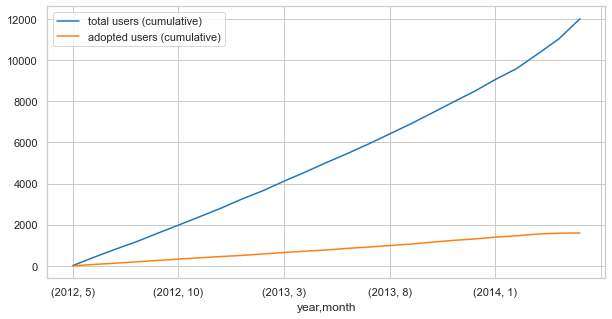

In [28]:
users['year'] = users['creation_time'].dt.year
users['month'] = users['creation_time'].dt.month
adopted_by_month = users.groupby(by=['year','month'])['adopted'].sum()
adopted_by_month_cum = np.cumsum(adopted_by_month)

users_by_month = users.groupby(by=['year','month'])['object_id'].count()
users_by_month_cum = np.cumsum(users_by_month)
users_by_month_cum

plt.figure(figsize=(10,5))
users_by_month_cum.plot(label='total users (cumulative)')
adopted_by_month_cum.plot(label='adopted users (cumulative)')
plt.legend()
plt.show()

Both total user growth and adopted user growth appear to be roughly linear over time, however the recent months show a greater jump in total user growth accompanied by a leveling out of adoption.

In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  object        
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  object        
 7   invited_by_user_id          6417 non-null   object        
 8   adopted                     12000 non-null  int64         
 9   year                        12000 non-null  int64         
 10  month                       12000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage

In [30]:
len(users.invited_by_user_id.unique())

2565

There are too many unique recommenders to go too deep here. Besides, basing predictions off of whether users were recommended by specific other users doesn't seem very sustainable.

But to get back to the timing piece, what if we examined the latency between account creation and first login? To do that, I will reload the logins data, since I previously deleted the time from the time stamp column.

In [31]:
logins = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])
first_logins_by_user = logins.groupby(by='user_id')['time_stamp'].min().reset_index()
first_logins_by_user

,user_id,time_stamp
0,1,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52
3,4,2013-05-22 08:09:28
4,5,2013-01-22 10:14:20
...,...,...
8818,11996,2013-09-06 06:14:15
8819,11997,2013-01-15 18:28:37
8820,11998,2014-04-27 12:45:16
8821,11999,2012-06-02 11:55:59


In [33]:
users = users.merge(first_logins_by_user, left_on='object_id', right_on='user_id', how='left')
users.rename(columns={'time_stamp':'first_login'}, inplace=True)
users.drop(columns=['user_id'], inplace=True)
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,year,month,first_login
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,2014,4,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,2013,11,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0,2013,3,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0,2013,5,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0,2013,1,2013-01-22 10:14:20


In [36]:
users['first_login_latency'] = users['first_login'] - users['creation_time']
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,year,month,first_login,first_login_latency
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,2014,4,2014-04-22 03:53:30,0 days
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,2013,11,2013-11-15 03:45:04,0 days
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0,2013,3,2013-03-19 23:14:52,0 days
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0,2013,5,2013-05-22 08:09:28,1 days
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0,2013,1,2013-01-22 10:14:20,5 days


In [37]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   object_id                   12000 non-null  object         
 1   creation_time               12000 non-null  datetime64[ns] 
 2   creation_source             12000 non-null  object         
 3   last_session_creation_time  8823 non-null   datetime64[ns] 
 4   opted_in_to_mailing_list    12000 non-null  int64          
 5   enabled_for_marketing_drip  12000 non-null  int64          
 6   org_id                      12000 non-null  object         
 7   invited_by_user_id          6417 non-null   object         
 8   adopted                     12000 non-null  int64          
 9   year                        12000 non-null  int64          
 10  month                       12000 non-null  int64          
 11  first_login                 8823 non-null

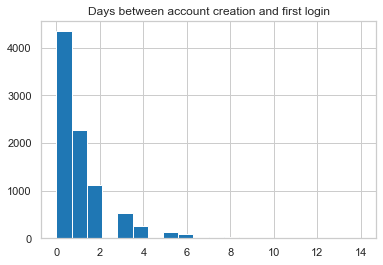

In [47]:
users.first_login_latency.dt.days.hist(bins=20)
plt.title('Days between account creation and first login')
plt.show()

I can be sure that the zero values shown above are true zeroes (users who first logged in on the same day as their account creation, sometimes simultaneously), because we also have several thousand null values for this column, corresponding to users who only signed up but never logged in:

In [45]:
users[users['first_login'].isnull()]

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,year,month,first_login,first_login_latency
7,8,2013-07-31 05:34:02,PERSONAL_PROJECTS,NaT,1,1,74,NaN,0,2013,7,NaT,NaT
8,9,2013-11-05 04:04:24,PERSONAL_PROJECTS,NaT,0,0,302,NaN,0,2013,11,NaT,NaT
11,12,2014-04-17 23:48:38,ORG_INVITE,NaT,0,0,130,9270,0,2014,4,NaT,NaT
14,15,2013-07-16 21:33:54,PERSONAL_PROJECTS,NaT,0,0,175,NaN,0,2013,7,NaT,NaT
15,16,2013-02-11 10:09:50,PERSONAL_PROJECTS,NaT,0,0,211,NaN,0,2013,2,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11975,11976,2013-12-25 22:01:41,PERSONAL_PROJECTS,NaT,0,0,248,NaN,0,2013,12,NaT,NaT
11977,11978,2014-04-23 16:28:06,PERSONAL_PROJECTS,NaT,1,0,29,NaN,0,2014,4,NaT,NaT
11984,11985,2013-07-08 17:23:26,PERSONAL_PROJECTS,NaT,0,0,74,NaN,0,2013,7,NaT,NaT
11992,11993,2013-03-28 23:24:21,PERSONAL_PROJECTS,NaT,0,0,281,NaN,0,2013,3,NaT,NaT


The nulls in `first_login` and `first_login_latency` naturally correspond to the original column `last_session_creation_time`.

So, there is a separate question of how to anticipate whether a user will even log in, and that's worth looking into in future analyses. For now, though, we can quickly get a sense of the average first-login latency for adopted users vs. non-adopted users, with the caveat that by definition we are only looking at users who logged in at least once:

In [50]:
users.groupby(by='first_login_latency')['adopted'].mean()

first_login_latency
0 days     0.190575
1 days     0.169903
2 days     0.182624
3 days     0.168207
4 days     0.182171
5 days     0.157143
6 days     0.172840
7 days     0.206897
8 days     0.000000
9 days     0.250000
10 days    1.000000
11 days    0.000000
12 days    0.000000
14 days    0.000000
Name: adopted, dtype: float64

In [51]:
users.groupby(by='first_login_latency')['adopted'].count()

first_login_latency
0 days     4350
1 days     2266
2 days     1128
3 days      541
4 days      258
5 days      140
6 days       81
7 days       29
8 days       18
9 days        4
10 days       1
11 days       3
12 days       3
14 days       1
Name: adopted, dtype: int64

As expected, first-day logins show a high adoption rate of 19%. (There are some outliers, e.g., 1 user had a latency of 10 days, and he adopted, showing a 100% adoption rate for that latency period.)

As for the bulk of the data (latencies of 0, 1, 2, or 3 days), day 0 is the place to be. This means that when users use the app at all, those who log in immediately are more likely to adopt.

In addition to examining what predicts at least one login, a direction for further investigation would be the time of day for account creation. For example: Are users who created their accounts in the evenings more likely to log in / adopt, because they're at home rather than at work?